<a href="https://colab.research.google.com/github/teamsimcoemmai/mmai894/blob/894-pj/Final%20Project/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# import scipy.io

import pandas as pd
import numpy as np

import os
# import random

import tensorflow as tf
import cv2 as cv

# from shutil import copyfile

from tqdm import tqdm

# from fastai.vision import *
# from fastai.metrics import error_rate
# from fastai import *
# import shutil

In [4]:
from tensorflow import keras
from keras import Input

from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D

from keras.preprocessing import image,image_dataset_from_directory

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau

# from keras.preprocessing import image

In [6]:
# Image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=90,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Get train, val and tets data
train_data = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/train_set',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/val_set',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/test_set',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 11330 images belonging to 196 classes.
Found 2428 images belonging to 196 classes.
Found 2427 images belonging to 196 classes.


## Build CNN Model

In [ ]:
model = Sequential()
#1st Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#2nd Convolution and Pooling Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
#3rd Convolution and Pooling Layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Flatten
model.add(Flatten())

#Input and Output Layer
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=196,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

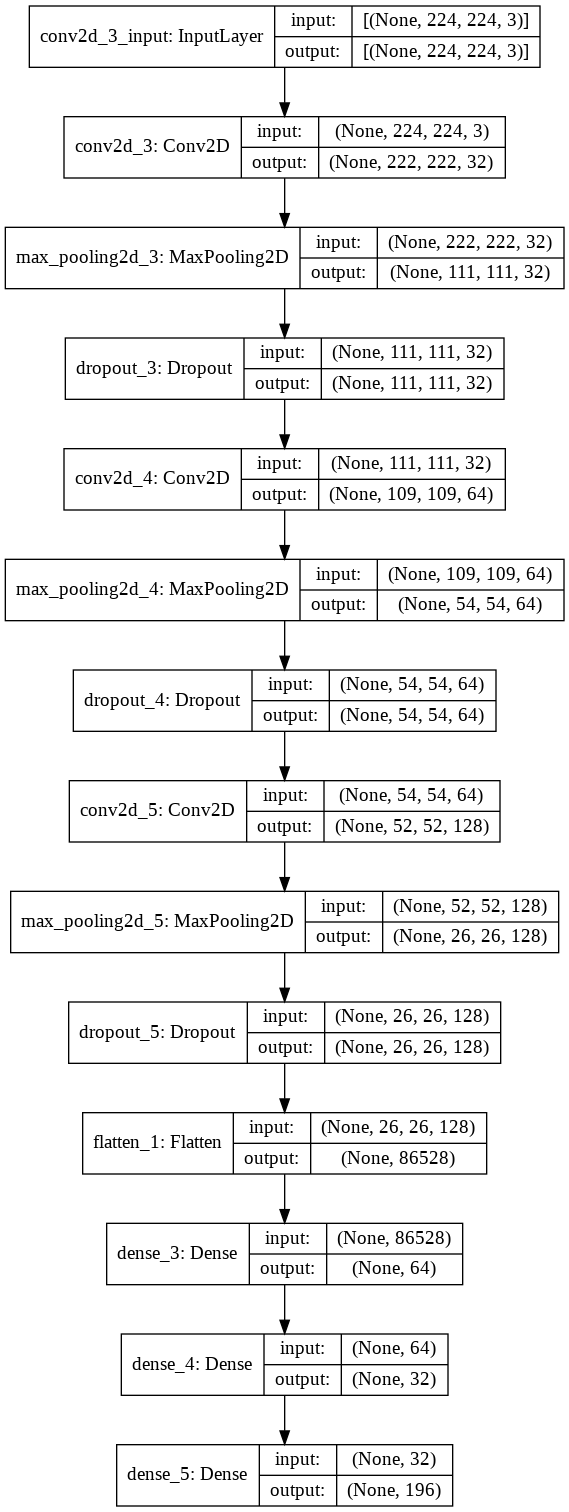

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=val_data,
                            validation_steps=50)
model.save('/content/gdrive/MyDrive/894 proj/CNN_3_Layers.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 45s 441ms/step - loss: 5.3682 - accuracy: 0.0028 - val_loss: 5.2780 - val_accuracy: 0.0056
Epoch 2/100
100/100 [==============================] - 44s 439ms/step - loss: 5.2776 - accuracy: 0.0080 - val_loss: 5.2795 - val_accuracy: 0.0050
Epoch 3/100
100/100 [==============================] - 44s 443ms/step - loss: 5.2764 - accuracy: 0.0065 - val_loss: 5.2788 - val_accuracy: 0.0088
Epoch 4/100
100/100 [==============================] - 44s 444ms/step - loss: 5.2758 - accuracy: 0.0126 - val_loss: 5.2796 - val_accuracy: 0.0094
Epoch 5/100
100/100 [==============================] - 44s 435ms/step - loss: 5.2732 - accuracy: 0.0074 - val_loss: 5.2447 - val_accuracy: 0.0094
Epoch 6/100
100/100 [==============================] - 44s 442ms/step - loss: 5.2492 - accuracy: 0.0120 - val_loss: 5.1977 - val_accuracy: 0.0100
Epoch 7/100
100/100 [==============================] - 44s 437ms/step - loss: 5.1864 - accuracy: 0.0082 - val_loss: 5.1670 -

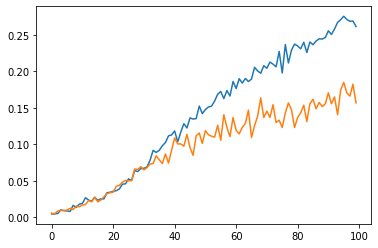

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')

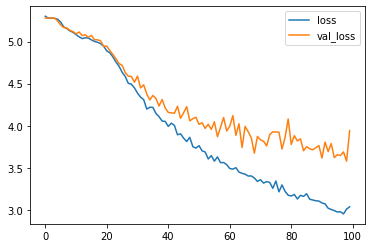

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

## Tune CNN Model

In [ ]:
model1 = Sequential()
#1st Convolution and Pooling Layer
model1.add(Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.5))
#2nd Convolution and Pooling Layer
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.3))
#3rd Convolution and Pooling Layer
model1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.4))

#Flatten
model1.add(Flatten())

#Adding Input and Output Layer
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=196,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 1.0e-5,
                         patience = 15,
                         verbose =2,
                         restore_best_weights = True)

checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/894 proj/models/',
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose = 2
                            )

reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                         factor=0.1,
                         patience=10,
                         verbose=2,
                         mode='auto',
                         min_delta=0.0001,
                         cooldown=0,
                         min_lr=0)

callbacks = [earlystop,checkpoint,reduce_lr]

In [ ]:
history1 = model1.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=100,
                            callbacks = callbacks,
                            validation_data=val_data,
                            validation_steps=50)
model1.save('/content/gdrive/MyDrive/894 proj/CNN_5_Layers.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 45s 448ms/step - loss: 5.1388 - accuracy: 0.0125 - val_loss: 5.1341 - val_accuracy: 0.0113
Epoch 2/100
100/100 [==============================] - 44s 436ms/step - loss: 5.1163 - accuracy: 0.0189 - val_loss: 5.1641 - val_accuracy: 0.0169
Epoch 3/100
100/100 [==============================] - 44s 445ms/step - loss: 5.0895 - accuracy: 0.0159 - val_loss: 5.1124 - val_accuracy: 0.0156
Epoch 4/100
100/100 [==============================] - 44s 436ms/step - loss: 5.0580 - accuracy: 0.0200 - val_loss: 5.0695 - val_accuracy: 0.0188
Epoch 5/100
100/100 [==============================] - 44s 436ms/step - loss: 5.0234 - accuracy: 0.0225 - val_loss: 5.0117 - val_accuracy: 0.0213
Epoch 6/100
100/100 [==============================] - 43s 428ms/step - loss: 4.9944 - accuracy: 0.0227 - val_loss: 5.0300 - val_accuracy: 0.0162
Epoch 7/100
100/100 [==============================] - 44s 439ms/step - loss: 4.9570 - accuracy: 0.0250 - val_loss: 5.0134 -

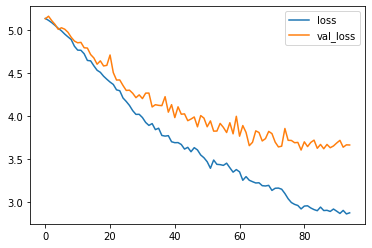

In [ ]:
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

## Model Prediction and Evaluation

In [7]:
## Prediction results before tuning
model = load_model('/content/gdrive/MyDrive/894 proj/CNN_3_Layers.hdf5')
model_pred = model.predict(test_data)
pred_labels = np.argmax(model_pred, axis=-1)
print(pred_labels.shape)  

## Prediction results after tuning
model1 = load_model('/content/gdrive/MyDrive/894 proj/CNN_5_Layers.hdf5')
model_pred1 = model1.predict(test_data)
pred_labels1 = np.argmax(model_pred1, axis=-1)  
print(pred_labels1.shape)

(2427,)
(2427,)


In [8]:
# load test csv
df_test_new = pd.read_csv('/content/gdrive/MyDrive/Simcoe/894/Car dataset/df_test_new.csv')
df_test_new

,Unnamed: 0,img_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,car_class_name,test_new,bbox_h,bbox_w,img_name
0,3,car_ims/000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000,1,100,164,000004.jpg
1,8,car_ims/000009.jpg,15,111,271,272,1,0,AM General Hummer SUV 2000,1,161,256,000009.jpg
2,20,car_ims/000021.jpg,50,127,587,396,1,0,AM General Hummer SUV 2000,1,269,537,000021.jpg
3,22,car_ims/000023.jpg,52,25,751,507,1,0,AM General Hummer SUV 2000,1,482,699,000023.jpg
4,25,car_ims/000026.jpg,21,18,492,316,1,0,AM General Hummer SUV 2000,1,298,471,000026.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,16144,car_ims/016145.jpg,104,165,416,381,196,0,smart fortwo Convertible 2012,1,216,312,016145.jpg
2423,16148,car_ims/016149.jpg,14,22,511,388,196,1,smart fortwo Convertible 2012,1,366,497,016149.jpg
2424,16150,car_ims/016151.jpg,26,64,477,381,196,1,smart fortwo Convertible 2012,1,317,451,016151.jpg
2425,16156,car_ims/016157.jpg,23,2,640,495,196,1,smart fortwo Convertible 2012,1,493,617,016157.jpg


In [9]:
# Define column names for test dataframe
feature_list = ['actual_class','predicted_class']

In [ ]:
# Calculate test accuracy for CNN before tuning
valid = pd.DataFrame(0, index=df_test_new.index, columns=feature_list)
valid['actual_class'] = df_test_new['class']
valid['predicted_class'] = pred_labels

valid['diff'] = np.where(valid['actual_class'] == valid['predicted_class'],1,0)
accuracy = valid['diff'].sum()/valid.shape[0]*100
print('Test accuracy for untuned CNN model is: {:.2f}%'.format(accuracy))

In [ ]:
# Calculate test accuracy for tuned CNN
valid1 = pd.DataFrame(0, index=df_test_new.index, columns=feature_list)
valid1['actual_class'] = df_test_new['class']
valid1['predicted_class'] = pred_labels1

valid1['diff'] = np.where(valid1['actual_class'] == valid1['predicted_class'],1,0)
accuracy1 = valid1['diff'].sum()/valid1.shape[0]*100
print('Test accuracy for tuned CNN model is: {:.2f}%'.format(accuracy1))